In [1]:
%load_ext autoreload
%autoreload 2

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Interactive Environment Generation

Cause I'm lazy, lets use [this pixel art tool](https://www.pixilart.com/draw#).

Follow these steps:

1. File -> New -> (height, width = 13, or whatever size you want but default minigrid is 15 x 15 with walls on all sides so 13 x 13)
2. Import the colour palette used: `00ff00,ff0000,0000ff,000000,ffffff`. On the bottom right ish you should see an import button: 

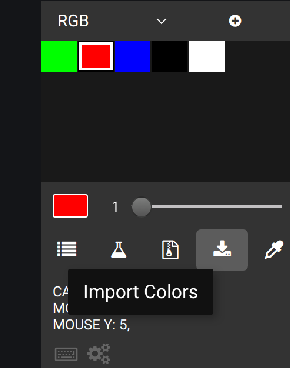

3. Draw your shit:
    - Blue: walls
    - Red: agent
    - Green: goal
    
4. Export your image as a png and then use it in this script

## Define creation classes (keep scrolling down)

In [86]:
AGENT = (255, 0, 0) # red
GOAL = (0, 255, 0)  # green
WALL = (0, 0, 255)  # blue


class AdversarialEnvCreator:
    def __init__(self, 
                 agent_colour: tuple = AGENT, 
                 goal_colour: tuple = GOAL, 
                 wall_colour: tuple = WALL,
                 debug: bool = False):
        
        self.agent = agent_colour
        self.goal = goal_colour
        self.wall = wall_colour
        self.d = debug
        
    def __call__(self, img: Image):
        # if RGBA, only keep 3 channels
        arr = np.array(img)[:,:,:3]
        if self.d:
            print("Should be 3 channels:\t\t", arr.shape)        
        
        # flatten the 2d array into one
        flat = arr.reshape(-1, 3)
        
        if self.d:
            print("Should be of shape (h * w, 3):\t", flat.shape)
        
        # get locations
        goal_locs = np.where(np.all(flat == GOAL, axis=-1))[0]  # cause np.where returns tuples idk why
        wall_locs = np.where(np.all(flat == WALL, axis=-1))[0]
        agent_locs = np.where(np.all(flat == AGENT, axis=-1))[0]
        
        if self.d:
            print("\nParsed pixels:")
            print("Goal loc:\t", goal_locs)
            print("Agent loc:\t", agent_locs)
            print("Wall loc:\t", wall_locs)

        # create adv env step list. Order is: Goal, Agent, Wall, Wall ... 
        output = [goal_locs[0], agent_locs[0]] + wall_locs.tolist()
        return output

# Create environments (start here)
___

### 1. Load the image and visualize it

In [87]:
img = Image.open("corridor_test.png")  # note RGBA so 4 channels!

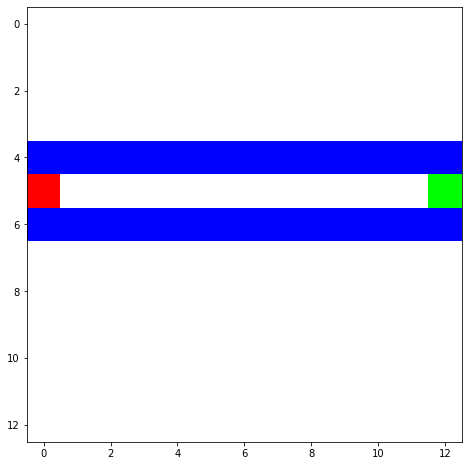

In [88]:
plt.imshow(img)

### 2. Use the environment creator thing to generate a list of steps

Note that if you want to change the default colours to creating an environment, you can read the `__init__` method of this class (this is NOT the colours we care about in the actual minigrid environment; this is just a mapping from the pixel art colours to the ordering of the adversarial env)

In [89]:
env_creator = AdversarialEnvCreator(debug=True)

In [90]:
adversarial_steps = env_creator(img)

Should be 3 channels:		 (13, 13, 3)
Should be of shape (h * w, 3):	 (169, 3)

Parsed pixels:
Goal loc:	 [77]
Agent loc:	 [65]
Wall loc:	 [52 53 54 55 56 57 58 59 60 61 62 63 64 78 79 80 81 82 83 84 85 86 87 88
 89 90]


In [92]:
# This is the order that you will pass into the env.step_adversary(i) method.
# Note that this will automatically flatten the input 2d array into a 1D 
print(adversarial_steps)

[77, 65, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


# Testing with Custom Multigrid

In [10]:
from custom_minigrid.envs import AdversarialEnv
import gym
import gym_minigrid

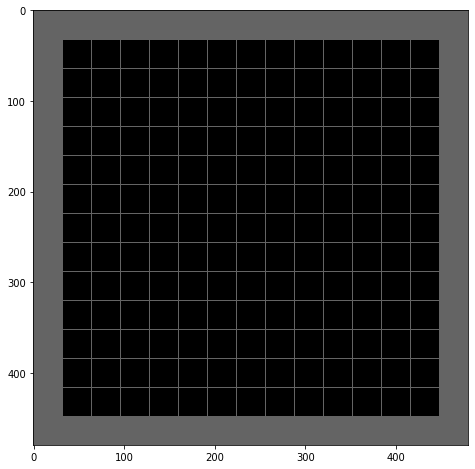

In [12]:
env = gym.make('MultiGrid-Adversarial-v0')
env.reset()
before_img = env.render('rgb_array')

plt.imshow(before_img);

In [50]:
env.reset()
env.step_adversary(adversarial_steps[0])
env.step_adversary(adversarial_steps[1])
for i in adversarial_steps[2:]:
    env.step_adversary(i)

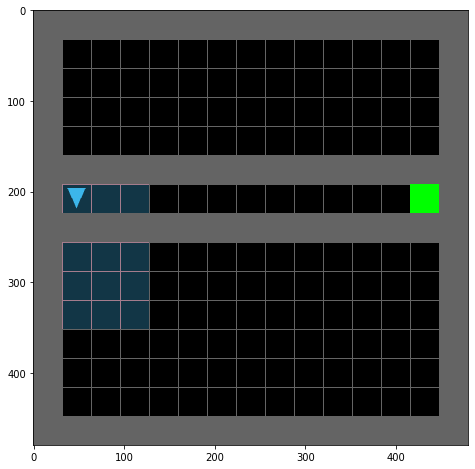

In [52]:
reset_img = env.render('rgb_array')
plt.imshow(reset_img);